In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [108]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None) 

In [109]:
#random seed for reproducability
np.random.seed(42)

In [110]:
plt.style.use("seaborn-v0_8")

##### Data Loading and initial exploration

In [111]:
df = pd.read_csv("../data/telco-customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
print("Columns names:\n", df.columns,"\n\n") 

df.info()


Columns names:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   

In [113]:
print(df.isnull().sum())
print(df.nunique())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2


#### Churn Rate Overview

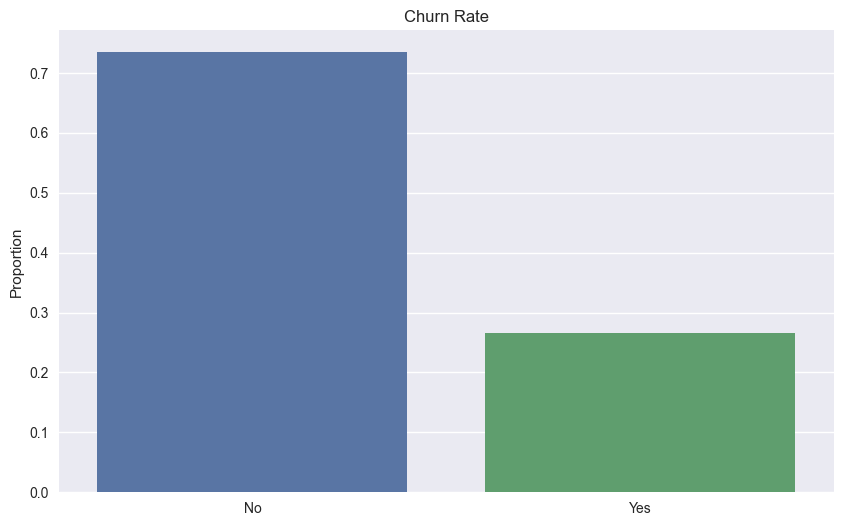

In [114]:
churn_rates = df['Churn'].value_counts(normalize = True)
plt.figure(figsize=(10,6))
sns.barplot(x = churn_rates.index, y = churn_rates.values)
plt.title("Churn Rate")
plt.ylabel('Proportion')
plt.show()

#### Churn by Gender

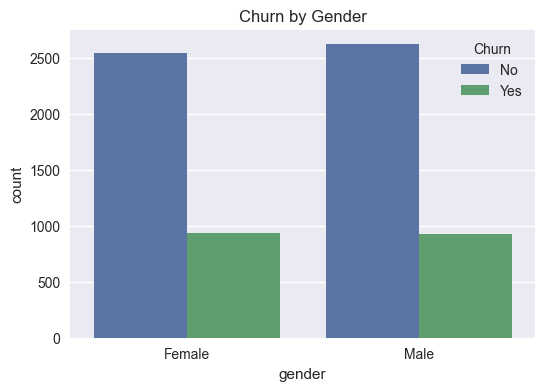

In [115]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

#### Distribution of Tenure

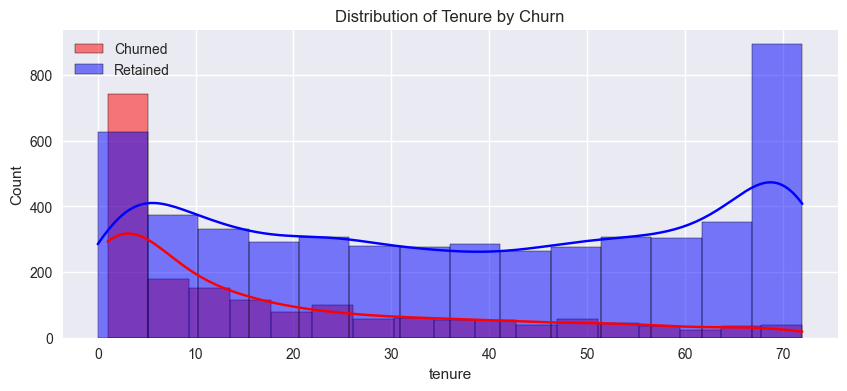

In [116]:
plt.figure(figsize=(10, 4))
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], color='red', label='Churned', kde=True)
sns.histplot(df[df['Churn'] == 'No']['tenure'], color='blue', label='Retained', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.legend()
plt.show()

#### Monthly Charges vs. Total Charges

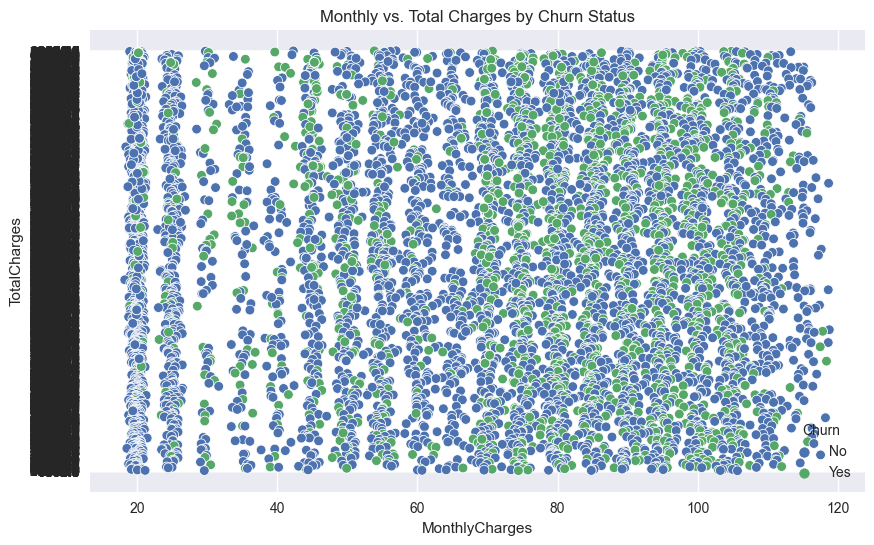

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly vs. Total Charges by Churn Status ')
plt.show()